# Method and Analysis

In [1]:
# import packages
import pandas as pd
import os 
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from researchpy import ttest as rpTtest
import researchpy as rp
import math

In [2]:
# find current path
path = os.getcwd()
print(path)

/Users/lucyyin/ST542/new


In [3]:
# read in cleaned data from Data Cleaning step, keep only complete records
data = pd.read_excel(path + '/3.The Single Clean Dataset.xlsx', sheet_name='Data for Analysis')
#data = data.dropna()

In [4]:
# find number of observations and number of variables
data.shape

(198, 82)

In [5]:
# see snippet of data
data.head()

,First Name,Last Name,Student ID number,LSC 101 Instructor,Gender,Race,Intended Major_beginning,Intended Major_end,Hometown Type_end,Deidentified Number,...,RSFlexibility,RSOriginality,FluencySA_end,FlexibilitySA_end,OriginalitySA_end,AverageSA_end,RSFluency_end,RSFlexibility_end,RSOriginality_end,Include Student data
0,Bilal,Adam Malik,200398445,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1,...,44,49,100,122,101,108,89,61,73,Yes
1,Hifza,Alam,200404629,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2,...,34,41,92,95,92,93,70,41,55,Yes
2,Ariba,Ali,200404663,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3,...,42,65,108,111,106,108,110,54,85,Yes
3,Lexie,Allred,200394288,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4,...,39,45,101,102,93,99,91,46,57,Yes
4,Fanuel,Andemariam,200430376,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5,...,36,48,91,93,90,91,69,40,51,Yes


In [6]:
# create new score difference columns
data['average_diff'] = data['AverageSA_end'] - data['AverageSA']
data['fluency_diff'] = data['FluencySA_end'] - data['FluencySA']
data['flexibility_diff'] = data['FlexibilitySA_end'] - data['FlexibilitySA']
data['originality_diff'] = data['OriginalitySA_end'] - data['OriginalitySA']
data.head()

,First Name,Last Name,Student ID number,LSC 101 Instructor,Gender,Race,Intended Major_beginning,Intended Major_end,Hometown Type_end,Deidentified Number,...,OriginalitySA_end,AverageSA_end,RSFluency_end,RSFlexibility_end,RSOriginality_end,Include Student data,average_diff,fluency_diff,flexibility_diff,originality_diff
0,Bilal,Adam Malik,200398445,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1,...,101,108,89,61,73,Yes,10,0,19,9
1,Hifza,Alam,200404629,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2,...,92,93,70,41,55,Yes,16,15,18,14
2,Ariba,Ali,200404663,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3,...,106,108,110,54,85,Yes,-42,-3,13,0
3,Lexie,Allred,200394288,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4,...,93,99,91,46,57,Yes,8,9,10,5
4,Fanuel,Andemariam,200430376,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5,...,90,91,69,40,51,Yes,3,7,6,-2


In [7]:
# see column names to make sure new columns were added
print(data.columns)

Index(['First Name', 'Last Name', 'Student ID number', 'LSC 101 Instructor',
       'Gender', 'Race', 'Intended Major_beginning', 'Intended Major_end',
       'Hometown Type_end', 'Deidentified Number', 'unweighted_hs_gpa',
       'weighted_hs_gpa', 'Quiz_Score_end', 'S1_beginning', 'S2_beginning',
       'S3_beginning', 'S4_beginning', 'S5_beginning', 'S6_beginning',
       'S7_beginning', 'S8_beginning', 'S9_beginning', 'S10_beginning',
       'S11_beginning', 'S12_beginning', 'S13_beginning', 'Q12a_beginning',
       'Q1_beginning', 'Q2_beginning', 'Q3_beginning', 'Q4_beginning',
       'Q5_beginning', 'Q6_beginning', 'Q7_beginning', 'Q8_beginning',
       'Q9_beginning', 'Q10_beginning', 'Q11_beginning', 'S1_end', 'S2_end',
       'S3_end', 'S4_end', 'S5_end', 'S6_end', 'S7_end', 'S8_end', 'S9_end',
       'S10_end', 'S11_end', 'S12_end', 'S13_end', 'Q12b_end', 'Q1_end',
       'Q2_ end', 'Q4_end', 'Q5_end', 'Q6_end', 'Q7_end', 'Q8_end', 'Q9_end',
       'Q10_end', 'Q11_end', 'Q1_e

## Research Idea 1

### Check Assumptions

In [8]:
# create box plots for 4 dimensions score differences to check for outliers
df_box = data[['fluency_diff', 'flexibility_diff', 'originality_diff', 'average_diff']]

Text(0.5, 1.0, 'Box Plots of Matched Pair Differences for each Dimension')

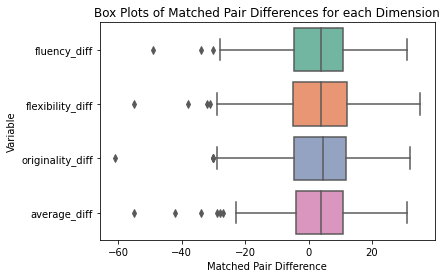

In [9]:
ax = sns.boxplot(data=df_box, orient='h', palette='Set2')
plt.xlabel('Matched Pair Difference')
plt.ylabel('Variable')
           
# displaying the title
plt.title("Box Plots of Matched Pair Differences for each Dimension")

In [10]:
# Use Tukey's method to find outliers
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [11]:
# find probable and possible outliers for average score difference
probable_outliers_avg, possible_outliers_avg = tukeys_method(data, "average_diff")
print(probable_outliers_avg)

[76]


In [12]:
print(possible_outliers_avg)

[2, 34, 76, 78, 107, 112]


In [13]:
# find probable and possible outliers for flexibility score difference
probable_outliers_flex, possible_outliers_flex = tukeys_method(data, "flexibility_diff")
print(probable_outliers_flex)

[]


In [14]:
print(possible_outliers_flex)

[49, 76, 78, 107]


In [15]:
# find probable and possible outliers for fluency score difference
probable_outliers_fluen, possible_outliers_fluen = tukeys_method(data, "fluency_diff")
print(probable_outliers_fluen)

[]


In [16]:
print(possible_outliers_fluen)

[34, 76, 78]


In [17]:
# find probable and possible outliers for originality score difference
probable_outliers_orig, possible_outliers_orig = tukeys_method(data, "originality_diff")
print(probable_outliers_orig)

[76]


In [18]:
print(possible_outliers_orig)

[27, 76, 106, 112]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Matched Pair Differences for Average')

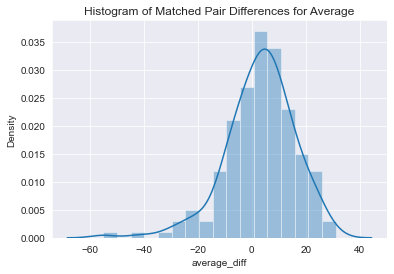

In [19]:
# create histograms for average score difference to check for normality
sns.set_style('darkgrid')
sns.distplot(data['average_diff'])
plt.title("Histogram of Matched Pair Differences for Average")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Matched Pair Differences for Flexibility')

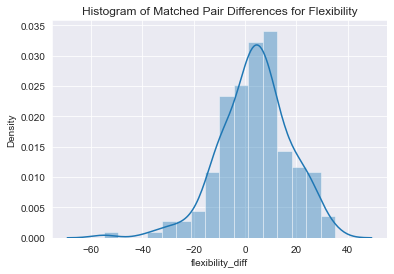

In [20]:
# create histograms for flexibility score difference to check for normality
sns.set_style('darkgrid')
sns.distplot(data['flexibility_diff'])
plt.title("Histogram of Matched Pair Differences for Flexibility")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Matched Pair Differences for Fluency')

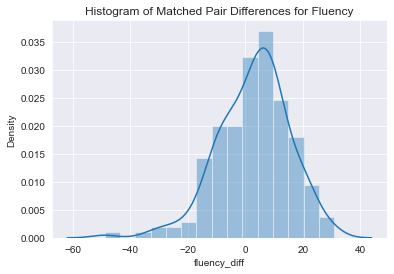

In [21]:
# create histograms for fluency score difference to check for normality
sns.set_style('darkgrid')
sns.distplot(data['fluency_diff'])
plt.title("Histogram of Matched Pair Differences for Fluency")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Matched Pair Differences for Originality')

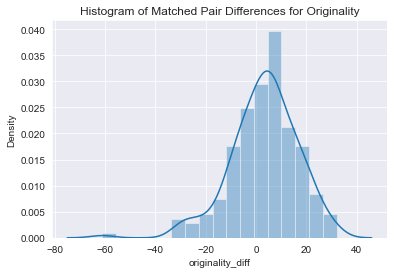

In [22]:
# create histograms for originality score difference to check for normality
sns.set_style('darkgrid')
sns.distplot(data['originality_diff'])
plt.title("Histogram of Matched Pair Differences for Originality")

### Paired Sample t-Tests (w/ obs.76)

In [23]:
# look at data
round(data[['AverageSA', 'AverageSA_end']].describe(),2)

,AverageSA,AverageSA_end
count,198.00,198.00
mean,89.65,92.70
std,14.27,10.75
min,61.00,50.00
25%,80.00,87.00
50%,87.50,92.00
75%,98.00,100.00
max,150.00,126.00


In [24]:
# look at data
round(data[['FluencySA', 'FluencySA_end']].describe(),2)

,FluencySA,FluencySA_end
count,198.00,198.00
mean,90.14,93.04
std,14.00,10.55
min,62.00,49.00
25%,80.25,88.00
50%,89.00,93.50
75%,100.00,99.00
max,135.00,123.00


In [25]:
# look at data
round(data[['FlexibilitySA', 'FlexibilitySA_end']].describe(),2)

,FlexibilitySA,FlexibilitySA_end
count,198.00,198.00
mean,89.68,93.44
std,13.94,12.67
min,62.00,50.00
25%,80.00,84.00
50%,87.00,93.00
75%,98.00,103.00
max,138.00,138.00


In [26]:
# look at data
round(data[['OriginalitySA', 'OriginalitySA_end']].describe(),2)

,OriginalitySA,OriginalitySA_end
count,198.00,198.00
mean,88.38,91.62
std,14.60,10.59
min,59.00,50.00
25%,78.00,87.00
50%,86.00,92.00
75%,98.75,98.00
max,135.00,120.00


In [27]:
# t-test results
stats.ttest_rel(data['AverageSA'], data['AverageSA_end'])

Ttest_relResult(statistic=-3.3377926918853995, pvalue=0.0010095940327564084)

In [28]:
# t-test results
stats.ttest_rel(data['FluencySA'], data['FluencySA_end'])

Ttest_relResult(statistic=-3.274476767752805, pvalue=0.001250478056484666)

In [29]:
# t-test results
stats.ttest_rel(data['FlexibilitySA'], data['FlexibilitySA_end'])

Ttest_relResult(statistic=-3.859636588896456, pvalue=0.00015386950752495595)

In [30]:
# t-test results
stats.ttest_rel(data['OriginalitySA'], data['OriginalitySA_end'])

Ttest_relResult(statistic=-3.401249777227825, pvalue=0.000812172041054233)

### Paired Sample t-Tests (w/out obs.76)

In [31]:
# drop 76th row (probable outlier)
new_data = data.drop(index=data.index[76],
                     axis=0, 
                     inplace=False)

In [32]:
# make sure we have 1 less observation in data
new_data.shape

(197, 86)

In [33]:
# look at data
round(new_data[['AverageSA', 'AverageSA_end']].describe(),2)

,AverageSA,AverageSA_end
count,197.00,197.00
mean,89.54,92.88
std,14.22,10.47
min,61.00,50.00
25%,80.00,87.00
50%,87.00,92.00
75%,98.00,100.00
max,150.00,126.00


In [34]:
# look at data
round(new_data[['FluencySA', 'FluencySA_end']].describe(),2)

,FluencySA,FluencySA_end
count,197.00,197.00
mean,90.05,93.21
std,13.98,10.29
min,62.00,49.00
25%,80.00,88.00
50%,89.00,94.00
75%,100.00,99.00
max,135.00,123.00


In [35]:
# look at data
round(new_data[['FlexibilitySA', 'FlexibilitySA_end']].describe(),2)

,FlexibilitySA,FlexibilitySA_end
count,197.00,197.00
mean,89.56,93.62
std,13.87,12.46
min,62.00,50.00
25%,80.00,84.00
50%,87.00,93.00
75%,98.00,103.00
max,138.00,138.00


In [36]:
# look at data
round(new_data[['OriginalitySA', 'OriginalitySA_end']].describe(),2)

,OriginalitySA,OriginalitySA_end
count,197.00,197.00
mean,88.26,91.82
std,14.53,10.23
min,59.00,50.00
25%,78.00,87.00
50%,85.00,92.00
75%,98.00,98.00
max,135.00,120.00


In [37]:
# t-test results
stats.ttest_rel(new_data['AverageSA'], new_data['AverageSA_end'])

Ttest_relResult(statistic=-3.8483735817969755, pvalue=0.00016083015224618624)

In [38]:
# t-test results
stats.ttest_rel(new_data['FluencySA'], new_data['FluencySA_end'])

Ttest_relResult(statistic=-3.723699474033127, pvalue=0.00025656912770077883)

In [39]:
# t-test results
stats.ttest_rel(new_data['FlexibilitySA'], new_data['FlexibilitySA_end'])

Ttest_relResult(statistic=-4.3533140146938445, pvalue=2.1580303589669697e-05)

In [40]:
# t-test results
stats.ttest_rel(new_data['OriginalitySA'], new_data['OriginalitySA_end'])

Ttest_relResult(statistic=-3.9647989230253255, pvalue=0.0001028977450119307)

## Research Idea 2 Approach 1

### Create New Data Columns w/ New Grouping of Levels

In [41]:
# create new major variable with 2 levels
data['new_major'] = ['Biology' if x == 'Biology - BA' or x == 'Biology - BS' else 'Others' for x in data['Intended Major_end']]
data['new_major'].value_counts()

Biology    115
Others      83
Name: new_major, dtype: int64

In [42]:
# create new gender variable with 2 levels
data['new_gender'] = ['Female' if x == 'Female' else 'Others' for x in data['Gender']]
data['new_gender'].value_counts()

Female    167
Others     31
Name: new_gender, dtype: int64

In [43]:
# create new race variable with 2 levels
data['new_race'] = ['Caucasian; White' if x == 'Caucasian; White' else 'Others' for x in data['Race']]
data['new_race'].value_counts()

Caucasian; White    141
Others               57
Name: new_race, dtype: int64

In [44]:
# create new hometown variable with 4 levels
hometown_dictionary = {'City' : 'City', 'Town' : 'Town', 'Suburb' : 'Suburb', 'Rural Area' : 'Others', 'Village' : 'Others'}
data['new_hometown'] = data['Hometown Type_end'].map(hometown_dictionary)
data['new_hometown'].value_counts()

Town      62
City      52
Suburb    49
Others    35
Name: new_hometown, dtype: int64

In [45]:
# create new gpa variable with 3 levels
data['new_gpa'] = pd.cut(data['weighted_hs_gpa'], bins=[3.421, 4.299, 4.499, 5.143], labels = ['Lower', 'Medium', 'Higher'])
data['new_gpa'].value_counts()

Medium    69
Higher    67
Lower     62
Name: new_gpa, dtype: int64

In [46]:
# make sure new columns are added
print(data.columns)

Index(['First Name', 'Last Name', 'Student ID number', 'LSC 101 Instructor',
       'Gender', 'Race', 'Intended Major_beginning', 'Intended Major_end',
       'Hometown Type_end', 'Deidentified Number', 'unweighted_hs_gpa',
       'weighted_hs_gpa', 'Quiz_Score_end', 'S1_beginning', 'S2_beginning',
       'S3_beginning', 'S4_beginning', 'S5_beginning', 'S6_beginning',
       'S7_beginning', 'S8_beginning', 'S9_beginning', 'S10_beginning',
       'S11_beginning', 'S12_beginning', 'S13_beginning', 'Q12a_beginning',
       'Q1_beginning', 'Q2_beginning', 'Q3_beginning', 'Q4_beginning',
       'Q5_beginning', 'Q6_beginning', 'Q7_beginning', 'Q8_beginning',
       'Q9_beginning', 'Q10_beginning', 'Q11_beginning', 'S1_end', 'S2_end',
       'S3_end', 'S4_end', 'S5_end', 'S6_end', 'S7_end', 'S8_end', 'S9_end',
       'S10_end', 'S11_end', 'S12_end', 'S13_end', 'Q12b_end', 'Q1_end',
       'Q2_ end', 'Q4_end', 'Q5_end', 'Q6_end', 'Q7_end', 'Q8_end', 'Q9_end',
       'Q10_end', 'Q11_end', 'Q1_e

### Data Visualizations

In [47]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

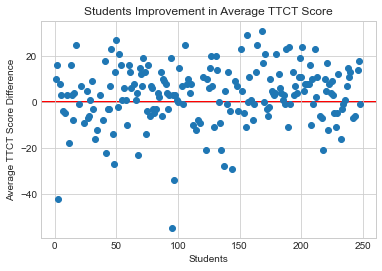

In [48]:
# scatter plot of average score change for each student
x = data['Deidentified Number']
y = data['average_diff']
fig, (ax1) = plt.subplots(1)
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
ax1.axhline(y=0, xmin=0, xmax=250, c="red", linewidth=2, zorder=0)
plt.title("Students Improvement in Average TTCT Score") 
plt.xlabel("Students")
plt.ylabel("Average TTCT Score Difference")
plt.scatter(x, y)

In [49]:
# see how many students increased, decrease or had no change in scores
pd.cut(x=data['average_diff'], bins=[-100, -0.01, 0.01, 50], labels=['negative','same', 'positive']).value_counts()

positive    124
negative     70
same          4
Name: average_diff, dtype: int64

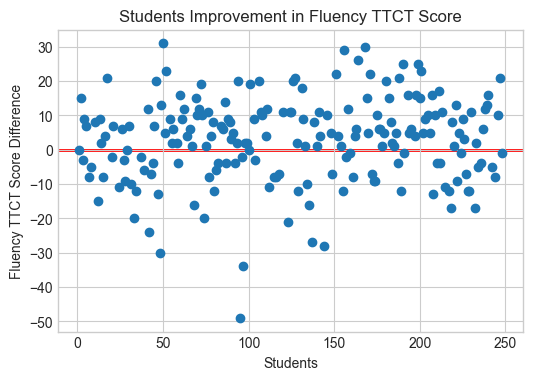

In [50]:
# scatter plot of fluency score change for each student
x = data['Deidentified Number']
y = data['fluency_diff']
fig, (ax1) = plt.subplots(1)
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
ax1.axhline(y=0, xmin=0, xmax=250, c="red", linewidth=2, zorder=0)
plt.title("Students Improvement in Fluency TTCT Score") 
plt.xlabel("Students")
plt.ylabel("Fluency TTCT Score Difference")
plt.scatter(x, y)

In [51]:
# see how many students increased, decrease or had no change in scores
pd.cut(x=data['fluency_diff'], bins=[-100, -0.01, 0.01, 50], labels=['negative','same', 'positive']).value_counts()

positive    125
negative     70
same          3
Name: fluency_diff, dtype: int64

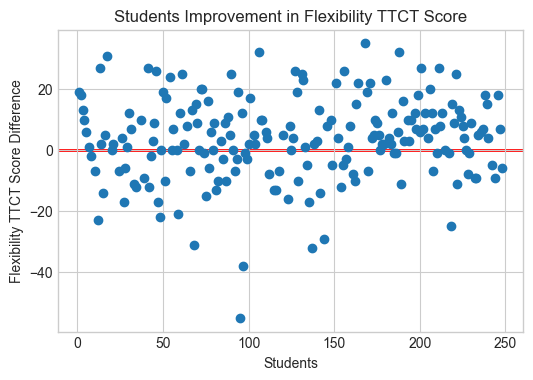

In [52]:
# scatter plot of flexibility score change for each student
x = data['Deidentified Number']
y = data['flexibility_diff']
fig, (ax1) = plt.subplots(1)
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
ax1.axhline(y=0, xmin=0, xmax=250, c="red", linewidth=2, zorder=0)
plt.title("Students Improvement in Flexibility TTCT Score") 
plt.xlabel("Students")
plt.ylabel("Flexibility TTCT Score Difference")
plt.scatter(x, y)

In [53]:
# see how many students increased, decrease or had no change in scores
pd.cut(x=data['flexibility_diff'], bins=[-100, -0.01, 0.01, 50], labels=['negative','same', 'positive']).value_counts()

positive    123
negative     64
same         11
Name: flexibility_diff, dtype: int64

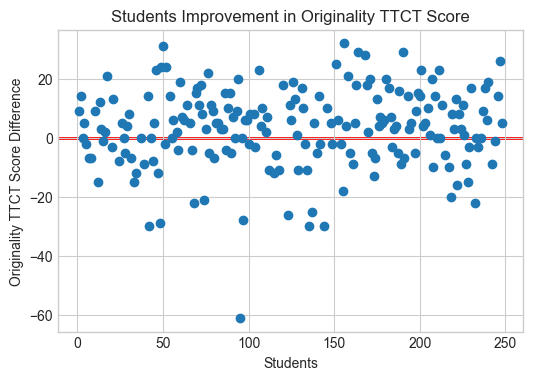

In [54]:
# scatter plot of originality score change for each student
x = data['Deidentified Number']
y = data['originality_diff']
fig, (ax1) = plt.subplots(1)
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
ax1.axhline(y=0, xmin=0, xmax=250, c="red", linewidth=2, zorder=0)
plt.title("Students Improvement in Originality TTCT Score") 
plt.xlabel("Students")
plt.ylabel("Originality TTCT Score Difference")
plt.scatter(x, y)

In [55]:
# see how many students increased, decrease or had no change in scores
pd.cut(x=data['originality_diff'], bins=[-100, -0.01, 0.01, 50], labels=['negative','same', 'positive']).value_counts()

positive    120
negative     67
same         11
Name: originality_diff, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


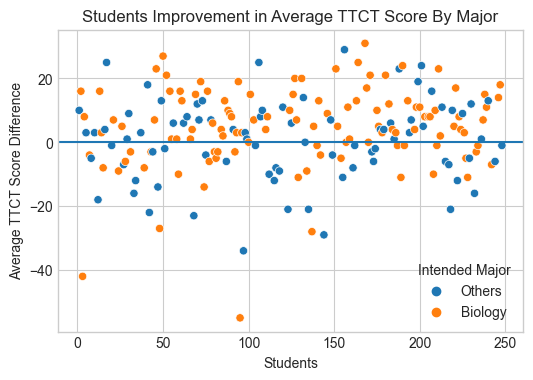

In [56]:
# scatter plot of average score difference, colored by major
import seaborn as sns
avg_graph = sns.scatterplot('Deidentified Number', 'average_diff', data=data, hue='new_major')
avg_graph.axhline(0)
plt.title("Students Improvement in Average TTCT Score By Major") 
plt.xlabel("Students")
plt.ylabel("Average TTCT Score Difference")
avg_graph.legend(title="Intended Major");

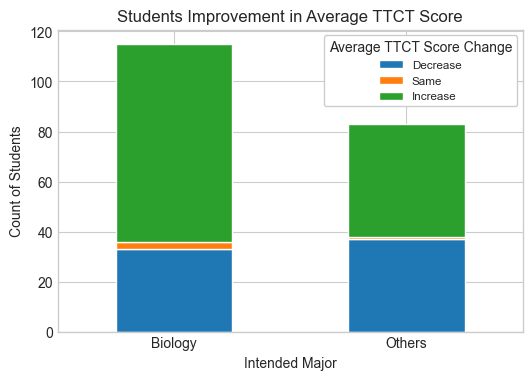

In [57]:
# stacked bar chart of average score change for major
data['average_diff_bin'] = pd.cut(x=data['average_diff'], bins=[-100, -0.01, 0.01, 50], labels=['Decrease','Same', 'Increase'])

major_table = pd.crosstab(data.new_major, data.average_diff_bin)
major_table
major_table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.title("Students Improvement in Average TTCT Score") 
plt.xlabel("Intended Major")
plt.ylabel("Count of Students")
plt.legend(title="Average TTCT Score Change",
                    loc=1, fontsize='small', framealpha=1, frameon=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


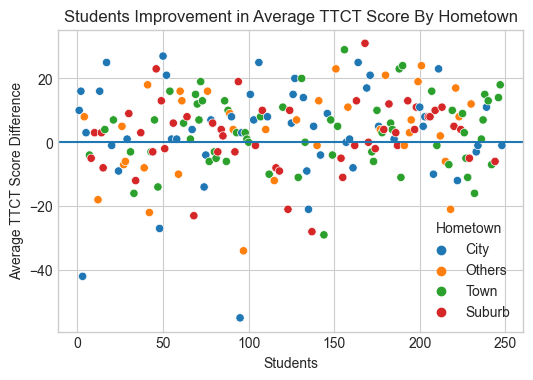

In [58]:
# scatter plot of average score difference, colored by hometown
avg_graph = sns.scatterplot('Deidentified Number', 'average_diff', data=data, hue='new_hometown')
avg_graph.axhline(0)
plt.title("Students Improvement in Average TTCT Score By Hometown") 
plt.xlabel("Students")
plt.ylabel("Average TTCT Score Difference")
avg_graph.legend(title="Hometown");

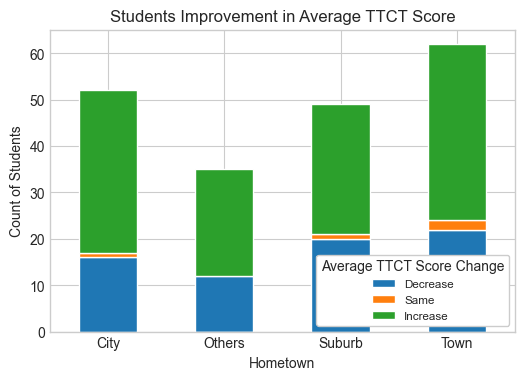

In [59]:
# stacked bar chart of average score change for hometown
hometown_table = pd.crosstab(data.new_hometown, data.average_diff_bin)
hometown_table
hometown_table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.title("Students Improvement in Average TTCT Score") 
plt.xlabel("Hometown")
plt.ylabel("Count of Students")
plt.legend(title="Average TTCT Score Change",
                    loc=4, fontsize='small', framealpha=1, frameon=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


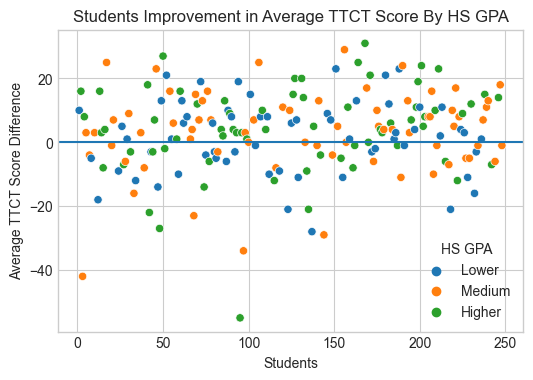

In [60]:
# scatter plot of average score difference, colored by HS GPA
avg_graph = sns.scatterplot('Deidentified Number', 'average_diff', data=data, hue='new_gpa')
avg_graph.axhline(0)
plt.title("Students Improvement in Average TTCT Score By HS GPA") 
plt.xlabel("Students")
plt.ylabel("Average TTCT Score Difference")
avg_graph.legend(title="HS GPA");

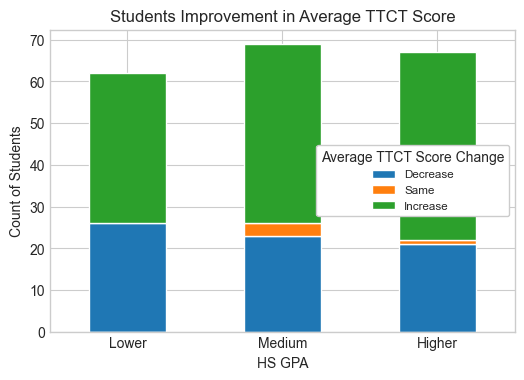

In [61]:
# stacked bar chart of average score change for HS GPA
gpa_table = pd.crosstab(data.new_gpa, data.average_diff_bin)
gpa_table
gpa_table.plot.bar(stacked = True)
plt.xticks(rotation = 0) 
plt.title("Students Improvement in Average TTCT Score") 
plt.xlabel("HS GPA")
plt.ylabel("Count of Students")
plt.legend(title="Average TTCT Score Change", loc=7,
                    fontsize='small', framealpha=1, frameon=True)

### Paired Sample t-Tests for Individual Variables

#### Major

In [62]:
major_biology = data.loc[data['new_major'] == 'Biology', :]
stats.ttest_rel(major_biology['AverageSA'], major_biology['AverageSA_end'])

Ttest_relResult(statistic=-4.058822892181705, pvalue=9.071856728588523e-05)

In [63]:
major_others = data.loc[data['new_major'] == 'Others', :]
stats.ttest_rel(major_others['AverageSA'], major_others['AverageSA_end'])

Ttest_relResult(statistic=-0.4098465542705219, pvalue=0.6829872630128158)

#### Hometown

In [64]:
hometown_city = data.loc[data['new_hometown'] == 'City', :]
stats.ttest_rel(hometown_city['AverageSA'], hometown_city['AverageSA_end'])

Ttest_relResult(statistic=-1.5223976707034912, pvalue=0.13408635571721358)

In [65]:
hometown_town = data.loc[data['new_hometown'] == 'Town', :]
stats.ttest_rel(hometown_town['AverageSA'], hometown_town['AverageSA_end'])

Ttest_relResult(statistic=-2.439374474871331, pvalue=0.017636336165781506)

In [66]:
hometown_suburb = data.loc[data['new_hometown'] == 'Suburb', :]
stats.ttest_rel(hometown_suburb['AverageSA'], hometown_suburb['AverageSA_end'])

Ttest_relResult(statistic=-1.298409508398529, pvalue=0.2003504842630856)

In [67]:
hometown_others = data.loc[data['new_hometown'] == 'Others', :]
stats.ttest_rel(hometown_others['AverageSA'], hometown_others['AverageSA_end'])

Ttest_relResult(statistic=-1.4463181509062073, pvalue=0.15724443867608304)

#### HS GPA

In [68]:
gpa_lower = data.loc[data['new_gpa'] == 'Lower', :]
stats.ttest_rel(gpa_lower['AverageSA'], gpa_lower['AverageSA_end'])

Ttest_relResult(statistic=-1.03579630404997, pvalue=0.30438600141898964)

In [69]:
gpa_medium = data.loc[data['new_gpa'] == 'Medium', :]
stats.ttest_rel(gpa_medium['AverageSA'], gpa_medium['AverageSA_end'])

Ttest_relResult(statistic=-2.1372311548697285, pvalue=0.03617844140239755)

In [70]:
gpa_higher = data.loc[data['new_gpa'] == 'Higher', :]
stats.ttest_rel(gpa_higher['AverageSA'], gpa_higher['AverageSA_end'])

Ttest_relResult(statistic=-2.4479489055266805, pvalue=0.017034067388272487)

## Research Idea 2 Approach 2

2 sample t-test for gpa medium and gpa higher

### Bartlett's test to check for equality of variances

Bartlett’s test is one of the popular tests in inferential statistics that addresses the data drawn from normal distribution. Bartlett’s test is used to test for equality of variances of a variable calculated for two or more groups (samples). If the p-value of Bartlett’s test is less than the significance level (for example 0.05), the variances of at least two groups are not equal.

In [71]:
# import package
from scipy.stats import bartlett

In [72]:
# compute some group summary statistics to understand the data better:
gpa_agg = (
    data.groupby('new_gpa').agg(mean_pre_avg_diff=("AverageSA", "mean"),
                                var_pre_avg_diff=("AverageSA", "var"),
                                mean_post_avg_diff=("AverageSA_end", "mean"),
                                var_post_avg_diff=("AverageSA_end", "var")
                               ).reset_index()
)

In [73]:
gpa_agg

,new_gpa,mean_pre_avg_diff,var_pre_avg_diff,mean_post_avg_diff,var_post_avg_diff
0,Lower,90.725806,222.530143,92.225806,128.603913
1,Medium,89.391304,211.300512,92.724638,106.614237
2,Higher,88.925373,182.827680,93.104478,116.125283


The variance for pre and post across the 3 groups are slightly different. To check it statistically we will perform the Bartlett’s test

In [74]:
# create the variables which will store observations relevant to a particular group
lower_group = data[data['new_gpa']=='Lower']['average_diff']
medium_group = data[data['new_gpa']=='Medium']['average_diff']
higher_group = data[data['new_gpa']=='Higher']['average_diff']

In [75]:
# Bartlett’s test
stat, p_value = bartlett(lower_group, medium_group, higher_group)

In [76]:
print(f"Bartlett's test statistic: {stat}")
print(f"P-value: {p_value}")

Bartlett's test statistic: 2.5843250534423987
P-value: 0.27467614585694416


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there are equal variances across 3 groups.

### 2-Sample t-Test

H0 => µ1 = µ2 (population mean of Medium GPA group is equal to Higher GPA group) \
HA => µ1 ≠ µ2 (population mean of Medium GPA group is different from Higher GPA group)

In [77]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=medium_group, b=higher_group, equal_var=True)

Ttest_indResult(statistic=-0.3661710775624387, pvalue=0.7148148976356494)

The p-value of the test comes out to be 0.7148148976356494, which is greater than the significance level alpha=0.05. We do not reject the null hypothesis that the population mean of Medium GPA group is equal to Higher GPA group. 

## Research Idea 2 Approach 3

In [78]:
# cross table between race and gender to see count
pd.crosstab(index=data['new_race'], columns=data['new_gender'])

new_gender,Female,Others
new_race,,
Caucasian; White,116,25
Others,51,6


In [79]:
# cross table between major and hometown to see count
pd.crosstab(index=data['new_major'], columns=data['new_hometown'])

new_hometown,City,Others,Suburb,Town
new_major,,,,
Biology,36,20,26,33
Others,16,15,23,29


In [80]:
# cross table between major and HS GPA to see count
pd.crosstab(index=data['new_major'], columns=data['new_gpa'])

new_gpa,Lower,Medium,Higher
new_major,,,
Biology,35,38,42
Others,27,31,25


In [81]:
# cross table between HS GPA and hometown to see count
pd.crosstab(index=data['new_gpa'], columns=data['new_hometown'])

new_hometown,City,Others,Suburb,Town
new_gpa,,,,
Lower,15,10,19,18
Medium,15,9,16,29
Higher,22,16,14,15


### Data Visualizations

In [82]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

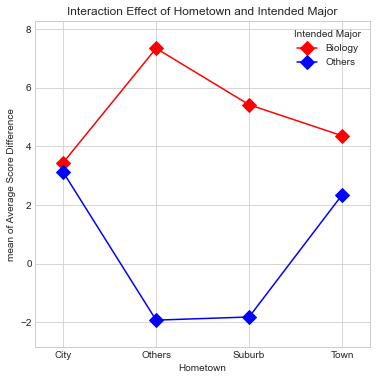

In [83]:
# interaction plot for major and hometown
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Interaction Effect of Hometown and Intended Major") 
fig = interaction_plot(
    x=data['new_hometown'],
    trace=data['new_major'],
    response=data['average_diff'],
    xlabel = "Hometown",
    ylabel = "Average Score Difference",
    colors=["red", "blue"],
    markers=["D", "D"],
    ms=10,
    ax=ax,
    legendtitle = "Intended Major"
)

# This plot suggests no interaction between major and hometown

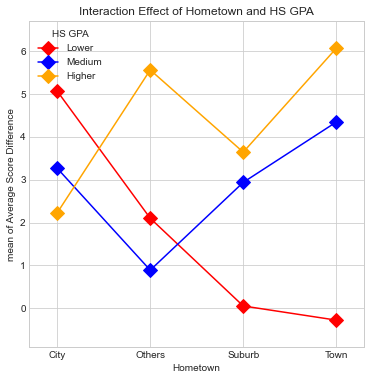

In [84]:
# interaction plot for HS GPA and hometown
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Interaction Effect of Hometown and HS GPA") 
fig = interaction_plot(
    x=data['new_hometown'],
    trace=data['new_gpa'],
    response=data['average_diff'],
    xlabel = "Hometown",
    ylabel = "Average Score Difference",
    colors=["red", "blue","orange"],
    markers=["D", "D", "D"],
    ms=10,
    ax=ax,
    legendtitle = "HS GPA"
)

# This plot suggests interaction between hometown and gpa

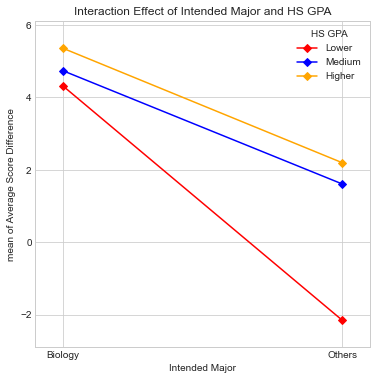

In [85]:
# interaction plot for major and HS GPA
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Interaction Effect of Intended Major and HS GPA") 
fig = interaction_plot(
    x=data['new_major'],
    trace=data['new_gpa'],
    response=data['average_diff'],
    xlabel = "Intended Major",
    ylabel = "Average Score Difference",
    colors=["red", "blue","orange"],
    markers=["D", "D", "D"],
    ms=5,
    ax=ax,
    legendtitle = "HS GPA"
)

# This plot suggests no interaction between major and gpa.

### Overall Model

In [86]:
# import package
from statsmodels.formula.api import ols

In [87]:
# model with all the variables and all the interactions between major, hometown, gpa
formula = 'average_diff ~ C(new_gender) + C(new_race) + C(new_major) + C(new_hometown) + C(new_gpa) + C(new_major):C(new_hometown) + C(new_major):C(new_gpa) + C(new_gpa):C(new_hometown) + C(new_major):C(new_hometown):C(new_gpa)'

# check overall model
anova5 = ols(formula, data=data).fit()
anova5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           average_diff   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.084
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.365
Time:                        15:32:48   Log-Likelihood:                -771.35
No. Observations:                 198   AIC:                             1595.
Df Residuals:                     172   BIC:                             1680.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 7.0050      4.129      1.697      0.092      -1.144      15.154
C(new_gender)[T.Others]                                                  -2.6483      2.678     -0.989      0.324      -7.935       2.639
C(new_race)[T.Others]                                                    -0.1052      2.155     -0.049      0.961      -4.359       4.148
C(new_major)[T.Others]                                                   -3.0615      7.168     -0.427      0.670     -17.210      11.087
C(new_hometown)[T.Others]                                                 1.1834      6.067      0.195      0.846     -10.792      13.159
C(new_hometown)[T.Suburb]                                                -3.6366      5.935     -0.613      0.541     -15.352       8.079
C(new_hometown)[T.Town]                                                  -6.7595      6.099     -1.108      0.269     -18.798       5.279
C(new_gpa)[T.Medium]                                                     -7.0872      5.891     -1.203      0.231     -18.715       4.541
C(new_gpa)[T.Higher]                                                     -2.1745      5.108     -0.426      0.671     -12.257       7.908
C(new_major)[T.Others]:C(new_hometown)[T.Others]                        -24.6269     12.507     -1.969      0.051     -49.313       0.059
C(new_major)[T.Others]:C(new_hometown)[T.Suburb]                         -3.1543      9.210     -0.342      0.732     -21.334      15.025
C(new_major)[T.Others]:C(new_hometown)[T.Town]                            2.7229      9.379      0.290      0.772     -15.791      21.237
C(new_major)[T.Others]:C(new_gpa)[T.Medium]                              13.2693      9.928      1.337      0.183      -6.327      32.866
C(new_major)[T.Others]:C(new_gpa)[T.Higher]                              -5.5973      9.645     -0.580      0.562     -24.635      13.441
C(new_gpa)[T.Medium]:C(new_hometown)[T.Others]                            4.8636      8.881      0.548      0.585     -12.665      22.393
C(new_gpa)[T.Higher]:C(new_hometown)[T.Others]                            4.6665      8.913      0.524      0.601     -12.926      22.259
C(new_gpa)[T.Medium]:C(new_hometown)[T.Suburb]                           13.3001      8.714      1.526      0.129      -3.901      30.501
C(new_gpa)[T.Higher]:C(new_hometown)[T.Suburb]                            4.0673      7.810      0.521      0.603     -11.348      19.482
C(new_gpa)[T.Medium]:C(new_hometown)[T.Town]                             12.6031      8.154      1.546      0.124      -3.492      28.698
C(new_gpa)[T.Higher]:C(new_hometown)[T.Town]   

Based on the summary, that model turned out to be non-significant. \
Then, try all the models that have all the variables and some from the interactions above, but none of those models turned out significant either. \
Checked all the models with all the variables and/or interactions possible with the hope to find a significant model so that we have something to analyze like interactions, main effects, etc.

### 5-way ANOVA

Null Hypothesis (H0) — All major/hometown/gpa combinations are equal in terms of mean average difference. \
Alternative Hypothesis (HA) — Some major/hometown/gpa combinations have greater mean average difference.

In [88]:
# import packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [89]:
# Performing 5-way ANOVA
model = ols('average_diff ~ C(new_major) + C(new_hometown) + C(new_gpa) + C(new_race) + C(new_gender) + C(new_major):C(new_hometown) + C(new_major):C(new_gpa) + C(new_gpa):C(new_hometown) + C(new_major):C(new_gpa):C(new_hometown)', data=data).fit()
result = sm.stats.anova_lm(model, type=5)

In [90]:
result

,df,sum_sq,mean_sq,F,PR(>F)
C(new_major),1.0,878.344497,878.344497,5.385568,0.021478
C(new_hometown),3.0,59.452234,19.817411,0.121510,0.947333
C(new_gpa),2.0,194.627017,97.313508,0.596678,0.551774
C(new_race),1.0,0.892408,0.892408,0.005472,0.941119
C(new_gender),1.0,162.496189,162.496189,0.996345,0.319599
C(new_major):C(new_hometown),3.0,759.930317,253.310106,1.553171,0.202616
C(new_major):C(new_gpa),2.0,136.610731,68.305366,0.418814,0.658495
C(new_gpa):C(new_hometown),6.0,950.459991,158.409998,0.971291,0.446265
C(new_major):C(new_gpa):C(new_hometown),6.0,1277.907750,212.984625,1.305915,0.256944
Residual,172.0,28051.869777,163.092266,NaN,NaN


### Tukey's Method Ad-Hoc

In [91]:
# import packages
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [92]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=data['average_diff'],
                          groups=data['new_major'],
                          alpha=0.05)

In [93]:
# see result for Major
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Biology Others  -4.2685 0.0206 -7.8748 -0.6622   True
-----------------------------------------------------


## Finding Significant Models

In [94]:
# Create dummy variables from the 5 predictor variables
dummy_gender = pd.get_dummies(data['new_gender'], prefix = 'new_gender')
dummy_race = pd.get_dummies(data['new_race'], prefix = 'new_race')
dummy_major = pd.get_dummies(data['new_major'], prefix = 'new_major')
dummy_hometown = pd.get_dummies(data['new_hometown'], prefix = 'new_hometown')
dummy_gpa = pd.get_dummies(data['new_gpa'], prefix = 'new_gpa')

In [95]:
# Add those dummy variables to the original dataset

df = pd.concat([data, dummy_gender, dummy_race, dummy_major, dummy_hometown, dummy_gpa], axis = 1)

df = df.rename(columns={"new_race_Caucasian; White": "new_race_White"})

In [96]:
# Create matrix X and vector y. Now our predictor variables will be the dummy variables.

X = df[['new_gender_Female','new_race_White','new_major_Biology','new_hometown_City','new_hometown_Suburb','new_hometown_Town','new_gpa_Lower','new_gpa_Medium']]
X = sm.add_constant(X)
y = df[['average_diff']]

X.head()

,const,new_gender_Female,new_race_White,new_major_Biology,new_hometown_City,new_hometown_Suburb,new_hometown_Town,new_gpa_Lower,new_gpa_Medium
0,1.0,0,0,0,1,0,0,1,0
1,1.0,1,0,1,1,0,0,0,0
2,1.0,1,0,1,1,0,0,0,1
3,1.0,1,1,1,0,0,0,0,0
4,1.0,0,0,0,1,0,0,0,1


In [97]:
# Check the multicollinearity between the predictor variables. VIF is less than 5, so no issues of multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,const,18.522653
1,new_gender_Female,1.054650
2,new_race_White,1.054674
3,new_major_Biology,1.026670
4,new_hometown_City,1.876000
5,new_hometown_Suburb,1.860550
6,new_hometown_Town,1.979336
7,new_gpa_Lower,1.369994
8,new_gpa_Medium,1.394672


In [98]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special

poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(X)
k=pd.DataFrame(X_tr,columns=poly.get_feature_names()) # k is the dataframe with 8 dummy variables and all 36 interaction variables
k.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x4 x5,x4 x6,x4 x7,x4 x8,x5 x6,x5 x7,x5 x8,x6 x7,x6 x8,x7 x8
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Drop the interaction variables that include gender and race from dataframe k and then concatenate it with X

Xt = pd.concat([X,k.drop(['1','x0','x1','x2','x3','x4','x5','x6','x7','x8',
 'x0 x1',
'x0 x2', 
'x0 x3', 
'x0 x4', 
 'x0 x5', 
'x0 x6',  
'x0 x7',
'x0 x8',                                                                            
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',],1)],1) # drop the interactions where either gender or race is included

/var/folders/y7/_1vxzd515rx2fsyf76lh5z980000gn/T/ipykernel_52077/566726670.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xt = pd.concat([X,k.drop(['1','x0','x1','x2','x3','x4','x5','x6','x7','x8',
/var/folders/y7/_1vxzd515rx2fsyf76lh5z980000gn/T/ipykernel_52077/566726670.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xt = pd.concat([X,k.drop(['1','x0','x1','x2','x3','x4','x5','x6','x7','x8',


In [100]:
Xt.head() # Xt has now 8 dummy variables and 15 interaction variables

,const,new_gender_Female,new_race_White,new_major_Biology,new_hometown_City,new_hometown_Suburb,new_hometown_Town,new_gpa_Lower,new_gpa_Medium,x3 x4,...,x4 x5,x4 x6,x4 x7,x4 x8,x5 x6,x5 x7,x5 x8,x6 x7,x6 x8,x7 x8
0,1.0,0,0,0,1,0,0,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,0,1,1,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,0,1,1,0,0,0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1,1,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,0,0,1,0,0,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# All this cell creates a table with R-squared and p-value for each model. Each model with have 8 main effects 
# (since there are 8 main dummy variables) and some interactions of them. This cell considers all the possible combinations
# of interactions. 

from itertools import chain, combinations

def powerset(iterable):
    #"powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

variables = list(Xt.columns)[9:] # 15 interaction variables

results = pd.DataFrame(columns = ['Variables', 'R-squared', 'P-value'])

for subset in powerset(variables):
    if len(subset) == 3: # includes 3 interactions in the model
        result = []
        new_X = pd.concat([Xt[['const','new_gender_Female','new_race_White','new_major_Biology','new_hometown_City','new_hometown_Suburb','new_hometown_Town','new_gpa_Lower','new_gpa_Medium']],Xt[list(subset)]], axis = 1)
        summary = sm.OLS(y, new_X).fit().summary().tables[0]
        results_as_html = summary.as_html()
        r2 = pd.read_html(results_as_html, header=0)[0].iloc[2].index[-1]
        p = pd.read_html(results_as_html, header=0)[0].iloc[2].values[-1]
        result.extend([subset,r2,p])
        
        results.loc[len(results.index)] = result


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression

In [102]:
results # Variables column shows the interaction terms that have been considered in the model

,Variables,R-squared,P-value
0,"(x3 x4, x3 x5, x3 x6)",0.063,0.330
1,"(x3 x4, x3 x5, x3 x7)",0.051,0.525
2,"(x3 x4, x3 x5, x3 x8)",0.050,0.550
3,"(x3 x4, x3 x5, x4 x5)",0.048,0.487
4,"(x3 x4, x3 x5, x4 x6)",0.048,0.487
...,...,...,...
450,"(x5 x7, x6 x8, x7 x8)",0.042,0.607
451,"(x5 x8, x6 x7, x6 x8)",0.046,0.626
452,"(x5 x8, x6 x7, x7 x8)",0.046,0.537
453,"(x5 x8, x6 x8, x7 x8)",0.043,0.592


In [103]:
# Find the max of R-squared
results['R-squared'].max()

'0.073'

In [104]:
# Find the model with p-value < 0.1
results[results['P-value']<0.1]

,Variables,R-squared,P-value


In [105]:
# This is the map of the dummy variable naming in Xt dataframe with naming in X dataframe

# x1 _> new_gender_Female
# x2 _> new_race_Caucasian; White
# x3 _> new_major_Biology
# x4 _> new_hometown_City
# x5 _> new_hometown_Suburb
# x6 _> new_hometown_Town
# x7 _> new_gpa_Lower
# x8 _> new_gpa_Medium

In [106]:
# From the "results" table above, if you find a significant model, then plug the interaction terms of that model in the 
# formula below based on the map above.

model = ols('average_diff ~  new_gender_Female + new_race_White + new_major_Biology + new_hometown_City + new_hometown_Suburb + new_hometown_Town + new_gpa_Lower + new_gpa_Medium+ new_major_Biology:new_hometown_City + new_major_Biology:new_hometown_Suburb + new_major_Biology:new_hometown_Town', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           average_diff   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.143
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.330
Time:                        15:32:56   Log-Likelihood:                -779.36
No. Observations:                 198   AIC:                             1583.
Df Residuals:                     186   BIC:                             1622.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.7198      4.558     -1.035      0.302     -13.712       4.273
new_gender_Female                         3.1197      2.593      1.203      0.230      -1.996       8.235
new_race_White                            0.5827      2.067      0.282      0.778      -3.495       4.660
new_major_Biology                        10.9743      4.504      2.436      0.016       2.088      19.861
new_hometown_City                         6.6429      4.720      1.407      0.161      -2.669      15.955
new_hometown_Suburb                       1.6993      4.407      0.386      0.700      -6.994      10.393
new_hometown_Town                         5.6584      4.230      1.338      0.183      -2.687      14.004
new_gpa_Lower                            -3.1618      2.360     -1.340      0.182      -7.818       1.494
new_gpa_Medium                           -1.2735      2.311     -0.551      0.582      -5.834       3.287
new_major_Biology:new_hometown_City     -10.9465      5.983     -1.830      0.069     -22.750       0.857
new_major_Biology:new_hometown_Suburb    -4.2117      5.896     -0.714      0.476     -15.843       7.419
new_major_Biology:new_hometown_Town      -9.6881      5.644     -1.717      0.088     -20.822       1.446
==============================================================================
Omnibus:                       36.822   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.535
Skew:                          -0.887   Prob(JB):                     6.53e-17
Kurtosis:                       5.427   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""